In [36]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
from random import shuffle

class capa():
    def __init__(self, n_neuronas_capa_anterior, n_neuronas, funcion_act):
        self.funcion_act = funcion_act
        self.b = np.round(stats.truncnorm.rvs(-1, 1, loc=0,
                          scale=1, size=n_neuronas).reshape(1, n_neuronas), 3)
        self.W = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size=n_neuronas *
                          n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior, n_neuronas), 3)


mi_capa = capa(3, 2, lambda x: x+1)
print(mi_capa.W)


[[ 0.598 -0.651]
 [-0.185  0.149]
 [ 0.019 -0.176]]


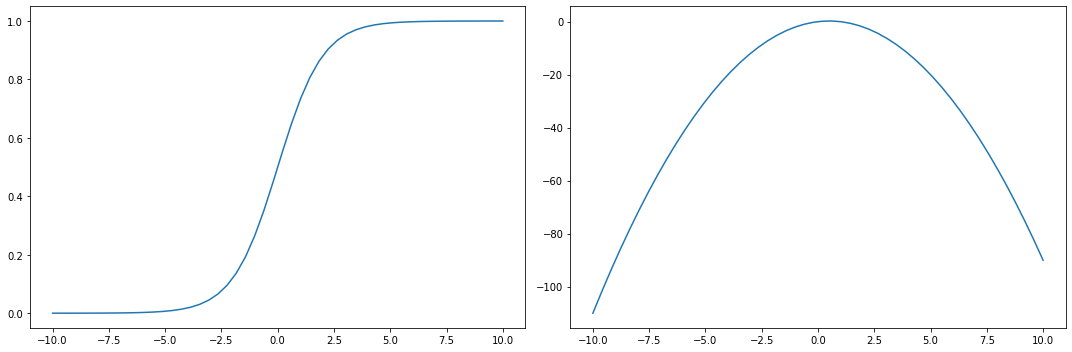

In [37]:
# Vairantes para la función de activavión, función sigmoide
sigmoid = (
    lambda x: 1 / (1 + np.exp(-x)),
    lambda x: x * (1 - x)
)


rango = np.linspace(-10, 10).reshape([50, 1])

datos_sigmoide = sigmoid[0](rango)
datos_sigmoide_derivada = sigmoid[1](rango)

# Cremos los graficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].plot(rango, datos_sigmoide)
axes[1].plot(rango, datos_sigmoide_derivada)
fig.tight_layout()


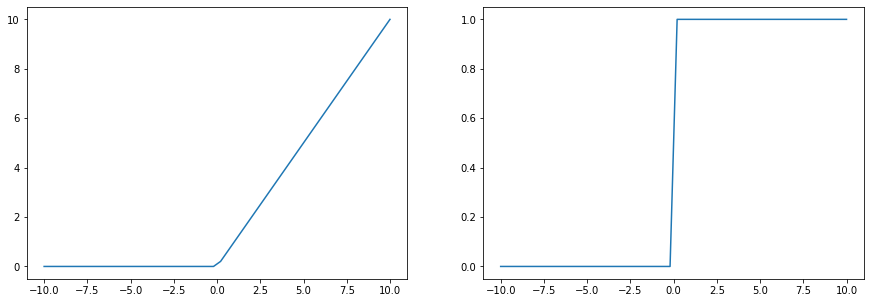

In [38]:
#Función de activación ReLU
def derivada_relu(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

relu = (
  lambda x: x * (x > 0),
  lambda x:derivada_relu(x)
  )

datos_relu = relu[0](rango)
datos_relu_derivada = relu[1](rango)

# Volvemos a definir rango que ha sido cambiado
rango = np.linspace(-10,10).reshape([50,1])

# Cremos los graficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_relu[:,0])
axes[1].plot(rango, datos_relu_derivada[:,0])
plt.show()



In [39]:
#Empezamos la creacion de la red nueronal personal
# Numero de neuronas en cada capa. 
# El primer valor es el numero de columnas de la capa de entrada.
neuronas = [2,4,8,1] 

# Funciones de activacion usadas en cada capa. 
funciones_activacion = [relu,relu, sigmoid]

red_neuronal = []

for paso in range(len(neuronas)-1):
  x = capa(neuronas[paso],neuronas[paso+1],funciones_activacion[paso])
  red_neuronal.append(x)

print(red_neuronal)

[<__main__.capa object at 0x000001AB4EA54CD0>, <__main__.capa object at 0x000001AB4E9F7D60>, <__main__.capa object at 0x000001AB4E9F7C10>]


In [40]:
X =  np.round(np.random.randn(20,2),3) # Ejemplo de vector de entrada
print("Matriy de entrada::", X)

Matriy de entrada:: [[-1.146  0.22 ]
 [-1.063  1.196]
 [ 1.075  0.355]
 [ 0.853  0.469]
 [ 0.65  -0.449]
 [ 0.05  -1.011]
 [ 1.911 -0.439]
 [ 1.436  0.495]
 [-0.879 -0.375]
 [ 1.796 -0.687]
 [-0.82   0.458]
 [ 0.124 -0.4  ]
 [ 0.476 -0.934]
 [-1.395 -0.989]
 [-1.703  1.562]
 [ 0.881  0.156]
 [ 1.076  0.815]
 [ 0.566  0.057]
 [-0.706 -0.608]
 [-0.087 -0.757]]


In [14]:
#Primero la multiplicacion matricial de la matriz de entrada por la matriz de pesos
z = X @ red_neuronal[0].W # @ es el oprador de multiplicacion matricial en python (filas de A * columnas de B para cada elemento)

print("z:",z[:10,:],"\n", z.shape)

z: [[ 0.80136  -0.401597 -1.043578  0.333332]
 [ 0.437968 -0.252712 -0.80352   0.23808 ]
 [-0.19008   0.171665  0.78373  -0.20762 ]
 [-0.78007   0.212934 -0.233234 -0.025004]
 [-1.012032  0.362803  0.30479  -0.17806 ]
 [-1.638934  0.428294 -0.623938 -0.020428]
 [ 1.185528 -0.429347 -0.38755   0.2159  ]
 [ 0.870394 -0.194782  0.560646 -0.044124]
 [ 1.18444  -0.165126  1.464236 -0.228184]
 [-0.27659   0.076928 -0.072678 -0.011268]] 
 (20, 4)


In [41]:
#Ahora a la matriz resultado le sumamos el bias o "b"
print(red_neuronal[0].b)
z_b = z + red_neuronal[0].b
print("Matriz resultado mas bias:", z_b)

[[-0.605 -0.173  0.367  0.667]]
Matriz resultado mas bias: [[ 1.963600e-01 -5.745970e-01 -6.765780e-01  1.000332e+00]
 [-1.670320e-01 -4.257120e-01 -4.365200e-01  9.050800e-01]
 [-7.950800e-01 -1.335000e-03  1.150730e+00  4.593800e-01]
 [-1.385070e+00  3.993400e-02  1.337660e-01  6.419960e-01]
 [-1.617032e+00  1.898030e-01  6.717900e-01  4.889400e-01]
 [-2.243934e+00  2.552940e-01 -2.569380e-01  6.465720e-01]
 [ 5.805280e-01 -6.023470e-01 -2.055000e-02  8.829000e-01]
 [ 2.653940e-01 -3.677820e-01  9.276460e-01  6.228760e-01]
 [ 5.794400e-01 -3.381260e-01  1.831236e+00  4.388160e-01]
 [-8.815900e-01 -9.607200e-02  2.943220e-01  6.557320e-01]
 [-1.387652e+00  1.315620e-01  7.710560e-01  4.889360e-01]
 [-6.840740e-01 -1.718200e-01  2.001660e-01  6.987960e-01]
 [ 2.630342e+00 -1.216780e+00  2.070620e-01  1.040972e+00]
 [-6.158980e-01  4.415200e-02  1.866750e+00  3.063000e-01]
 [-3.268720e-01 -2.150850e-01  6.875980e-01  6.189880e-01]
 [ 4.761460e-01 -4.925280e-01  5.189540e-01  7.427240e-0

In [42]:
#Una vey sumado el bias se aplica la funcin de activacion en dicha capa

a = red_neuronal[0].funcion_act[0](z_b)#ReLU
print(a[:5,:])# imprimimos las primers cinco lineas para ver si relu se aplico correctamente

[[ 0.19636  -0.       -0.        1.000332]
 [-0.       -0.       -0.        0.90508 ]
 [-0.       -0.        1.15073   0.45938 ]
 [-0.        0.039934  0.133766  0.641996]
 [-0.        0.189803  0.67179   0.48894 ]]


In [43]:
output = [X]

for num_capa in range(len(red_neuronal)):
  print("capa:", num_capa)
  z_b = output[-1] @ red_neuronal[num_capa].W + red_neuronal[num_capa].b
  a = red_neuronal[num_capa].funcion_act[0](z_b)
  output.append(a)

print(output[-1]) # en salida se guardan todos los resultados de las capas anteriores pero solo nos importa la última, la que está totalmente procesada

capa: 0
capa: 1
capa: 2
[[0.54602309]
 [0.61103351]
 [0.72123033]
 [0.71800482]
 [0.59940977]
 [0.49546157]
 [0.68706132]
 [0.75501023]
 [0.50716232]
 [0.65183935]
 [0.56254867]
 [0.55281775]
 [0.51705682]
 [0.43774683]
 [0.6124108 ]
 [0.68859315]
 [0.76585419]
 [0.64811192]
 [0.50063702]
 [0.50301157]]


Enrenamiento de la red neuronal

In [44]:
def mse(Ypredich, Yreal):

  # Calculamos el error
  x = (np.array(Ypredich) - np.array(Yreal)) ** 2
  x = np.mean(x)

  # Calculamos la derivada de la funcion
  y = np.array(Ypredich) - np.array(Yreal)
  return (x,y)

In [54]:
Y = [0] * 10 + [1] * 10
shuffle(Y)
Y = np.array(Y).reshape(len(Y),1)


0.20609503481314806
0.15129493034292013
0.5201731889119089
0.5155309215432324
0.16047253237145293

In [66]:
print(output[-1][:5])
print(Y[:5])
print(mse(output[-1], Y)[0])

[[0.54602309]
 [0.61103351]
 [0.72123033]
 [0.71800482]
 [0.59940977]]
[[1]
 [1]
 [0]
 [0]
 [1]]
0.28700424906143146
